<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb rayleighbenard.do.txt  -->

# Demo - Rayleigh Benard
**Mikael Mortensen** (email: `mikaem@math.uio.no`), Department of Mathematics, University of Oslo.

Date: **November 21, 2019**

**Summary.** Rayleigh-Benard convection arise
due to temperature gradients in a fluid. The governing equations are
Navier-Stokes coupled (through buoyancy) with an additional temperature
equation derived from the first law of thermodynamics, using a linear
correlation between density and temperature.

This is a demonstration of how the Python module [shenfun](https://github.com/spectralDNS/shenfun) can be used to solve for
these Rayleigh-Benard cells in a 2D channel with two walls of
different temperature in one direction, and periodicity in the other direction.
The solver described runs with MPI
without any further considerations required from the user.
Note that there is also a more physically realistic [3D solver](https://github.com/spectralDNS/shenfun/blob/master/demo/RayleighBenard.py).
The solver described in this demo has been implemented in a class in the
[RayleighBenard2D.py](https://github.com/spectralDNS/shenfun/blob/master/demo/RayleighBenard2D.py)
module in the demo folder of shenfun. Below is an example solution, which has been run at a very high
Rayleigh number (*Ra*).

<!-- dom:FIGURE: [https://raw.githack.com/spectralDNS/spectralutilities/master/movies/RB_256_512_movie_jet.png, width=800] Temperature fluctuations in the Rayleigh Benard flow. The top and bottom walls are kept at different temperatures and this sets up the Rayleigh-Benard convection. The simulation is run at *Ra* =1,000,000, *Pr* =0.7 with 256 and 512 quadrature points in *x* and *y*-directions, respectively. <a id="fig:RB"></a> -->
<!-- begin figure -->
<a id="fig:RB"></a>

<img src="https://raw.githack.com/spectralDNS/spectralutilities/master/movies/RB_256_512_movie_jet.png" width="800"><p style="font-size: 0.9em"><i>Figure 1: Temperature fluctuations in the Rayleigh Benard flow. The top and bottom walls are kept at different temperatures and this sets up the Rayleigh-Benard convection. The simulation is run at <em>Ra</em> =1,000,000, <em>Pr</em> =0.7 with 256 and 512 quadrature points in <em>x</em> and <em>y</em>-directions, respectively.</i></p>
<!-- end figure -->

## The Rayleigh Bénard equations
<a id="demo:rayleighbenard"></a>

The governing equations solved in domain $\Omega=(-1, 1)\times [0, 2\pi)$ are

<!-- Equation labels as ordinary links -->
<a id="eq:momentum"></a>

$$
\begin{equation}
    \frac{\partial \boldsymbol{u}}{\partial t} + (\boldsymbol{u} \cdot \nabla) \boldsymbol{u} = - \nabla p + \sqrt{\frac{Pr}{Ra}} \nabla^2 \boldsymbol{u}  + T \boldsymbol{i}, \label{eq:momentum} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:T"></a>

$$
\begin{equation}  
    \frac{\partial T}{\partial t} +\boldsymbol{u} \cdot \nabla T = \frac{1}{\sqrt{RaPr}} \nabla^2 T, \label{eq:T} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:div"></a>

$$
\begin{equation}  
    \nabla \cdot \boldsymbol{u} = 0, \label{eq:div} \tag{3}
\end{equation}
$$

where $\boldsymbol{u}(x, y, t) (= u\boldsymbol{i} + v\boldsymbol{j})$ is the velocity vector, $p(x, y, t)$ is pressure, $T(x, y, t)$ is the temperature, and $\boldsymbol{i}$ and
$\boldsymbol{j}$ are the unity vectors for the $x$ and $y$-directions, respectively.

The equations are complemented with boundary conditions $\boldsymbol{u}(\pm 1, y, t) = (0, 0), \boldsymbol{u}(x, 2 \pi, t) = \boldsymbol{u}(x, 0, t), T(-1, y, t) = 1, T(1, y, t) =  0, T(x, 2 \pi, t) = T(x, 0, t)$.
Note that these equations have been non-dimensionalized according to [[pandey18]](#pandey18), using dimensionless
Rayleigh number $Ra=g \alpha \Delta T h^3/(\nu \kappa)$ and Prandtl number $Pr=\nu/\kappa$. Here
$g \boldsymbol{i}$ is the vector accelleration of gravity, $\Delta T$ is the temperature difference between
the top and bottom walls, $h$ is the hight of the channel in $x$-direction, $\nu$ is the
dynamic viscosity coefficient, $\kappa$ is the heat transfer coefficient and $\alpha$ is the
thermal expansion coefficient. Note that the
governing equations have been non-dimensionalized using the free-fall velocityscale
$U=\sqrt{g \alpha \Delta T h}$. See [[pandey18]](#pandey18) for more details.

The governing equations contain a non-trivial coupling between velocity, pressure and temperature.
This coupling can be simplified by eliminating the pressure from the equation for the wall-normal velocity
component $u$. We accomplish this by taking the Laplace of the momentum equation in wall normal
direction, using the pressure from the divergence of the momentum equation
$\nabla^2 p = -\nabla \cdot \boldsymbol{H}+\partial T/\partial x$, where
$\boldsymbol{H} = (H_x, H_y) = (\boldsymbol{u} \cdot \nabla) \boldsymbol{u}$

<!-- Equation labels as ordinary links -->
<a id="eq:rb:u"></a>

$$
\begin{equation}
    \frac{\partial \nabla^2 {u}}{\partial t} = \frac{\partial^2 H_y}{\partial x \partial y} - \frac{\partial^2 H_x}{\partial y\partial y}  + \sqrt{\frac{Pr}{Ra}} \nabla^4 {u}  + \frac{\partial^2 T}{\partial y^2} . \label{eq:rb:u} \tag{4}
\end{equation}
$$

This equation is solved with $u(\pm 1,y,t) = \partial u/\partial x(\pm 1,y,t) = 0$, where the latter follows from the
divergence constraint. In summary, we now seem to have the following equations to solve:

<!-- Equation labels as ordinary links -->
<a id="eq:rb:u2"></a>

$$
\begin{equation}
    \frac{\partial \nabla^2 {u}}{\partial t} = \frac{\partial^2 H_y}{\partial x \partial y} - \frac{\partial^2 H_x}{\partial y\partial y}  + \sqrt{\frac{Pr}{Ra}} \nabla^4 {u}  + \frac{\partial^2 T}{\partial y^2}, \label{eq:rb:u2} \tag{5}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:v"></a>

$$
\begin{equation}  
    \frac{\partial v}{\partial t} + H_y = -  \frac{\partial p}{\partial y} + \sqrt{\frac{Pr}{Ra}} \nabla^2 v, \label{eq:v} \tag{6}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:T2"></a>

$$
\begin{equation}  
    \frac{\partial T}{\partial t} +\boldsymbol{u} \cdot \nabla T = \frac{1}{\sqrt{RaPr}} \nabla^2 T, \label{eq:T2} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:div2"></a>

$$
\begin{equation}  
    \nabla \cdot \boldsymbol{u} = 0 \label{eq:div2} \tag{8}.
\end{equation}
$$

However, we note that Eqs. ([5](#eq:rb:u2)) and ([7](#eq:T2)) and ([8](#eq:div2)) do not depend on pressure, and,
apparently, on each time step we can solve ([5](#eq:rb:u2)) for $u$, then ([8](#eq:div2)) for $v$ and finally ([7](#eq:T2)) for $T$.
So what do we need ([6](#eq:v)) for? It appears to have become redundant from the elimination of the
pressure from Eq. ([5](#eq:rb:u2)). It turns out that this is actually almost completely true, but
([5](#eq:rb:u2)), ([7](#eq:T2)) and ([8](#eq:div2)) can only provide closure for all but one of the
Fourier coefficients. To see this it is necessary to introduce some discretization and basis functions
that will be used to solve the problem. To this end we use $P_N$, which is the set of all real polynomials
of degree less than or equal to N and introduce the following finite-dimensional approximation spaces

<!-- Equation labels as ordinary links -->
<a id="eq:VB"></a>

$$
\begin{equation}
  V_N^B(x) = \{v \in P_N | v(\pm 1) = v´(\pm 1) = 0\}, \label{eq:VB} \tag{9} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:VD"></a>

$$
\begin{equation}  
  V_N^D(x) = \{v \in P_N | v(\pm 1) = 0\}, \label{eq:VD} \tag{10} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:VT"></a>

$$
\begin{equation}  
  V_N^T(x) = \{v \in P_N | v(-1) = 0, v(1) = 1\}, \label{eq:VT} \tag{11} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:VW"></a>

$$
\begin{equation}  
  V_N^W(x) = \{v \in P_N\}, \label{eq:VW} \tag{12} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:VF"></a>

$$
\begin{equation}  
  V_M^F(y) = \{\exp(\imath l y) | l \in [-M/2, -M/2+1, \ldots M/2-1]\}. \label{eq:VF} \tag{13}
\end{equation}
$$

Here $\text{dim}(V_N^B) = N-4, \text{dim}(V_N^D) = \text{dim}(V_N^W) = \text{dim}(V_N^T) = N-2$
and $\text{dim}(V_M^F)=M$. We note that
$V_N^B, V_N^D, V_N^W$ and $V_N^T$ can be used to approximate $u, v, T$ and $p$, respectively, in the $x$-direction.
Also note that for $V_M^F$ it is assumed that $M$ is an even number.

We can now choose basis functions for the spaces, using Shen's composite bases for either Legendre or
Chebyshev polynomials. For the Fourier space the basis functions are already given. We leave the actual choice
of basis as an implementation option for later. For now we use $\phi^B(x), \phi^D(x), \phi^W$ and $\phi^T(x)$
as common notation for basis functions in spaces $V_N^B, V_N^D, V_N^W$ and $V_N^T$, respectively.

To get the required approximation spaces for the entire domain we use tensor products of the
one-dimensional spaces in ([9](#eq:VB))-([13](#eq:VF))

<!-- Equation labels as ordinary links -->
<a id="eq:WBF"></a>

$$
\begin{equation}
  W_{BF} = V_N^B \otimes V_M^F, \label{eq:WBF} \tag{14}  
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:WDF"></a>

$$
\begin{equation}  
  W_{DF} = V_N^D \otimes V_M^F, \label{eq:WDF} \tag{15}  
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:WTF"></a>

$$
\begin{equation}  
  W_{TF} = V_N^T \otimes V_M^F, \label{eq:WTF} \tag{16}  
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:WWF"></a>

$$
\begin{equation}  
  W_{WF} = V_N^W \otimes V_M^F. \label{eq:WWF} \tag{17}
\end{equation}
$$

Space $W_{BF}$ has 2D tensor product basis functions $\phi_k^B(x) \exp (\imath l y)$ and
similar for the others. All in all
we get the following approximations for the unknowns

<!-- Equation labels as ordinary links -->
<a id="_auto1"></a>

$$
\begin{equation}
    u_N(x, y, t) = \sum_{k \in \boldsymbol{k}_B} \sum_{l \in \boldsymbol{l}} \hat{u}_{kl}(t) \phi_k^B(x) \exp(\imath l y), 
\label{_auto1} \tag{18}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto2"></a>

$$
\begin{equation}  
    v_N(x, y, t) = \sum_{k \in \boldsymbol{k}_D} \sum_{l \in \boldsymbol{l}} \hat{v}_{kl}(t) \phi_k^D(x) \exp(\imath l y), 
\label{_auto2} \tag{19}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto3"></a>

$$
\begin{equation}  
    p_N(x, y, t) = \sum_{k \in \boldsymbol{k}_W} \sum_{l \in \boldsymbol{l}} \hat{p}_{kl}(t) \phi_k^W(x) \exp(\imath l y), 
\label{_auto3} \tag{20}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto4"></a>

$$
\begin{equation}  
    T_N(x, y, t) = \sum_{k \in \boldsymbol{k}_T} \sum_{l \in \boldsymbol{l}} \hat{T}_{kl}(t) \phi_k^T(x) \exp(\imath l y),
\label{_auto4} \tag{21}
\end{equation}
$$

where $\boldsymbol{k}_{x} = \{0, 1, \ldots \text{dim}(V_N^x)-1\}, \, \text{for} \, x\in(B, D, W, T)$
and $\boldsymbol{l} = \{-M/2, -M/2+1, \ldots, M/2-1\}$.
Note that since the problem is defined in real space we will have Hermitian symmetry. This means
that $\hat{u}_{k, l} = \overline{\hat{u}}_{k, -l}$, with an overbar being a complex conjugate,
and similar for $\hat{v}_{kl}, \hat{p}_{kl}$ and
$\hat{T}_{kl}$. For this reason we can get away with
solving for only the positive $l$'s, as long as we remember that the sum in the end goes over both positive
and negative $l's$. This is actually automatically taken care of by the FFT provider and is
not much of an additional complexity in the implementation. So from now on $\boldsymbol{l} = \{0, 1, \ldots, M/2\}$.

We can now take a look at why Eq. ([6](#eq:v)) is needed. If we first solve ([5](#eq:rb:u2)) for
$\hat{u}_{kl}(t), (k, l) \in \boldsymbol{k}_B \times \boldsymbol{l}$, then we can use ([8](#eq:div2)) to
solve for $\hat{v}_{kl}(t)$. But here there is a problem. We can see this by creating the variational
form required to solve ([8](#eq:div2)) by the spectral Galerkin method. To this end make $v=v_N$ in ([8](#eq:div2))
a trial function, use $u=u_N$ a known function and take the weighted inner product over the
domain using test function $q \in W_{DF}$

<!-- Equation labels as ordinary links -->
<a id="_auto5"></a>

$$
\begin{equation}
    \left < \frac{\partial u_N}{\partial x} + \frac{\partial v_N}{\partial y}, q \right > _w = 0.
\label{_auto5} \tag{22}
\end{equation}
$$

Here we are using the inner product notation

<!-- Equation labels as ordinary links -->
<a id="_auto6"></a>

$$
\begin{equation}
    \left < a, b \right > _w = \int_{-1}^1 \int_0^{2\pi} a \overline{b} dx_wdy_w \left(\approx \sum_{i}\sum_{j} a(x_i, y_j) \overline{b}(x_i, y_j) w_i w_j\right),
\label{_auto6} \tag{23}
\end{equation}
$$

where the exact form of the
weighted scalar product depends on the chosen basis; Legendre has $dx_w=dx$, Chebyshev
$dx_w = dx/\sqrt{1-x^2}$ and Fourier $dy_w=dy/2/\pi$. The bases also have associated quadrature weights
$\{w_i \}_{i=0}^{N-1}$ and $\{w_j\}_{j=0}^{M-1}$ that are used to approximate the integrals.

Inserting now for the known $u_N$, the unknown $v_N$, and $q=\phi_m^D(x) \exp(\imath n y)$ the
continuity equation becomes

$$
\int_{-1}^1 \int_{0}^{2\pi} \frac{\partial}{\partial x} \left(\sum_{k \in \boldsymbol{k}_B} \sum_{l \in \boldsymbol{l}} \hat{u}_{kl}(t) \phi_k^B(x) \exp(\imath l y) \right) \phi_m^D(x) \exp(-\imath n y) dx_w dy_w + \\ 
  \int_{-1}^1 \int_{0}^{2\pi} \frac{\partial}{\partial y} \left(\sum_{k \in \boldsymbol{k}_D} \sum_{l \in \boldsymbol{l}} \hat{v}_{kl}(t) \phi_k^D(x) \exp(\imath l y) \right) \phi_m^D(x) \exp(-\imath n y) dx_w dy_w  = 0.
$$

The $x$ and $y$ domains are separable, so we can rewrite as

$$
\sum_{k \in \boldsymbol{k}_B} \sum_{l \in \boldsymbol{l}} \int_{-1}^1 \frac{\partial \phi_k^B(x)}{\partial x}  \phi_m^D(x) dx_w \int_{0}^{2\pi} \exp(\imath l y) \exp(-\imath n y) dy_w \hat{u}_{kl} + \\ 
    \sum_{k \in \boldsymbol{k}_D} \sum_{l \in \boldsymbol{l}} \int_{-1}^1 \phi_k^D(x) \phi_m^D(x) dx_w   \int_{0}^{2\pi} \frac{\partial \exp(\imath l y)}{\partial y} \exp(-\imath n y) dy_w \hat{v}_{kl} = 0.
$$

Now perform some exact manipulations in the Fourier direction and introduce the
1D inner product notation for the $x$-direction

<!-- Equation labels as ordinary links -->
<a id="_auto7"></a>

$$
\begin{equation}
    \left(a, b\right)_w = \int_{-1}^1 a(x) b(x) dx_w \left(\approx \sum_{j = 0}^{N-1} a(x_j)b(x_j) w_j\right).
\label{_auto7} \tag{24}
\end{equation}
$$

By also simplifying the notation using summation of repeated indices,
we get the following equation

<!-- Equation labels as ordinary links -->
<a id="_auto8"></a>

$$
\begin{equation}
   \delta_{ln} \left(\frac{\partial \phi_k^B}{\partial x}, \phi_m^D \right)_w \hat{u}_{kl}
   + \imath l \delta_{ln} \left(\phi_k^D, \phi_m^D \right)_w \hat{v}_{kl}  = 0.
\label{_auto8} \tag{25}
\end{equation}
$$

Now $l$ must equal $n$ and we can simplify some more

<!-- Equation labels as ordinary links -->
<a id="eq:div3"></a>

$$
\begin{equation}
   \left(\frac{\partial \phi_k^B}{\partial x}, \phi_m^D \right)_w \hat{u}_{kl}
   + \imath l \left(\phi_k^D, \phi_m^D \right)_w \hat{v}_{kl}  = 0. \label{eq:div3} \tag{26}
\end{equation}
$$

We see that this equation can be solved for
$\hat{v}_{kl} \text{ for } (k, l) \in \boldsymbol{k}_D \times [1, 2, \ldots, M/2]$, but try with
$l=0$ and you hit division by zero, which obviously is not allowed. And this is the reason
why Eq. ([6](#eq:v)) is still needed, to solve for $\hat{v}_{k,0}$! Fortunately,
since $\exp(\imath 0 y) = 1$, the pressure derivative $\frac{\partial p}{\partial y} = 0$,
and as such the pressure is still not required. When used only for
Fourier coefficient 0, Eq. ([6](#eq:v)) becomes

<!-- Equation labels as ordinary links -->
<a id="eq:vx"></a>

$$
\begin{equation}
\frac{\partial v}{\partial t} + N_y = \sqrt{\frac{Pr}{Ra}} \frac{\partial^2 v}{\partial x^2}. \label{eq:vx} \tag{27}
\end{equation}
$$

There is still one more revelation to be made from Eq. ([26](#eq:div3)). When $l=0$ we get

<!-- Equation labels as ordinary links -->
<a id="_auto9"></a>

$$
\begin{equation}
    \left(\frac{\partial \phi_k^B}{\partial x}, \phi_m^D \right)_w \hat{u}_{k,0} = 0,
\label{_auto9} \tag{28}
\end{equation}
$$

which is trivially satisfied if $\hat{u}_{k,0}=0$ for $k\in\boldsymbol{k}_B$. Bottom line is
that we only need to solve Eq. ([5](#eq:rb:u2)) for $l \in \boldsymbol{l}/\{0\}$, whereas we can use
directly $\hat{u}_{k,0}=0 \text{ for } k \in \boldsymbol{k}_B$.

To sum up, with the solution known at $t = t - \Delta t$, we solve

:::{table}
:widths: auto

|      Equation                                           |             For unknown     |                With indices                                         |
| :------------------------------------------------------ | :-------------------------- | :------------------------------------------------------------------ |
| (<a class="reference external" href="#eq:rb:u2">5</a>)  |     {math}`\hat{u}_{kl}(t)` |    {math}`(k, l) \in \boldsymbol{k}_B \times \boldsymbol{l}/\{0\}`  |
| (<a class="reference external" href="#eq:div2">8</a>)   |     {math}`\hat{v}_{kl}(t)` |    {math}`(k, l) \in \boldsymbol{k}_D \times \boldsymbol{l}/\{0\}`  |
| (<a class="reference external" href="#eq:vx">27</a>)    |     {math}`\hat{v}_{kl}(t)` |    {math}`(k, l) \in \boldsymbol{k}_D \times \{0\}`                 |
| (<a class="reference external" href="#eq:T2">7</a>)     |     {math}`\hat{T}_{kl}(t)` |    {math}`(k, l) \in \boldsymbol{k}_T \times \boldsymbol{l}`        |

:::


## Temporal discretization

The governing equations are integrated in time using any one of the time steppers available in
shenfun. There are several possible IMEX Runge Kutta methods, see [integrators.py](https://github.com/spectralDNS/shenfun/blob/master/shenfun/utilities/integrators.py).
The time steppers are used for any generic equation

<!-- Equation labels as ordinary links -->
<a id="eq:genericpsi"></a>

$$
\begin{equation}
 \frac{\partial \psi}{\partial t} = \mathcal{N} + \mathcal{L}\psi \label{eq:genericpsi} \tag{29},
\end{equation}
$$

where $\mathcal{N}$ and $\mathcal{L}$ represents the nonlinear and linear contributions, respectively.
The timesteppers are provided with $\psi, \mathcal{L}$ and $\mathcal{N}$, and possibly some tailored
linear algebra solvers, and solvers are then further assembled under the hood.

All the timesteppers split one time step into one or several stages.
The classes [IMEXRK222](https://shenfun.readthedocs.io/en/latest/shenfun.utilities.html#shenfun.utilities.integrators.IMEXRK222), [IMEXRK3](https://shenfun.readthedocs.io/en/latest/shenfun.utilities.html#shenfun.utilities.integrators.IMEXRK3) and [IMEXRK443](https://shenfun.readthedocs.io/en/latest/shenfun.utilities.html#shenfun.utilities.integrators.IMEXRK443)
have 2, 3 and 4 steps, respectively, and the cost is proportional.

## Implementation

To get started we need instances of the approximation spaces discussed in
Eqs. ([9](#eq:VB)) - ([17](#eq:WWF)). When the spaces are created we also need
to specify the family and the dimension of each space. Here we simply
choose Chebyshev and Fourier with 100 and 256 quadrature points in $x$ and
$y$-directions, respectively. We could replace 'Chebyshev' by 'Legendre',
but the former is known to be faster due to the existence of fast transforms.

In [1]:
from shenfun import *

N, M = 64, 128
family = 'Chebyshev'
VB = FunctionSpace(N, family, bc=(0, 0, 0, 0))
VD = FunctionSpace(N, family, bc=(0, 0))
VW = FunctionSpace(N, family)
VT = FunctionSpace(N, family, bc=(1, 0))
VF = FunctionSpace(M, 'F', dtype='d')

And then we create tensor product spaces by combining these bases (like in Eqs. ([14](#eq:WBF))-([17](#eq:WWF))).

In [2]:
W_BF = TensorProductSpace(comm, (VB, VF))    # Wall-normal velocity
W_DF = TensorProductSpace(comm, (VD, VF))    # Streamwise velocity
W_WF = TensorProductSpace(comm, (VW, VF))    # No bc
W_TF = TensorProductSpace(comm, (VT, VF))    # Temperature
BD = VectorSpace([W_BF, W_DF])   # Velocity vector
DD = VectorSpace([W_DF, W_DF])   # Convection vector
W_DFp = W_DF.get_dealiased(padding_factor=1.5)
BDp = BD.get_dealiased(padding_factor=1.5)

Here the `VectorSpae` create mixed tensor product spaces by the
Cartesian products `BD = W_BF` $\times$ `W_DF` and `DD = W_DF` $\times$ `W_DF`.
These mixed space will be used to hold the velocity and convection vectors,
but we will not solve the equations in a coupled manner and continue in the
segregated approach outlined above.

We also need containers for the computed solutions. These are created as

In [3]:
u_  = Function(BD)     # Velocity vector, two components
T_  = Function(W_TF)   # Temperature
H_  = Function(DD)     # Convection vector
uT_ = Function(BD)     # u times T

### Wall-normal velocity equation

We implement Eq. ([5](#eq:rb:u2)) using a generic time stepper.
To this end we first need to declare some test- and trial functions, as well as
some model constants and the length of the time step. We store the
PDE time stepper in a dictionary called `pdes` just for convenience:

In [4]:

# Specify viscosity and time step size using dimensionless Ra and Pr
Ra = 1000000
Pr = 0.7
nu = np.sqrt(Pr/Ra)
kappa = 1./np.sqrt(Pr*Ra)
dt = 0.025

# Choose timestepper and create instance of class

PDE = IMEXRK3 # IMEX222, IMEXRK443

v = TestFunction(W_BF) # The space we're solving for u in

pdes = {
    'u': PDE(v,                              # test function
             div(grad(u_[0])),               # u
             lambda f: nu*div(grad(f)),      # linear operator on u
             [Dx(Dx(H_[1], 0, 1), 1, 1)-Dx(H_[0], 1, 2), Dx(T_, 1, 2)],
             dt=dt,
             solver=chebyshev.la.Biharmonic if family == 'Chebyshev' else la.SolverGeneric1ND,
             latex=r"\frac{\partial \nabla^2 u}{\partial t} = \nu \nabla^4 u + \frac{\partial^2 N_y}{\partial x \partial y} - \frac{\partial^2 N_x}{\partial y^2}")
}
pdes['u'].assemble()

Notice the one-to-one resemblance with ([5](#eq:rb:u2)).

The right hand side depends on the convection vector $\boldsymbol{H}$, which can be computed in many different ways.
Here we will make use of
the identity $(\boldsymbol{u} \cdot \nabla) \boldsymbol{u} = -\boldsymbol{u} \times (\nabla \times \boldsymbol{u}) + 0.5 \nabla\boldsymbol{u} \cdot \boldsymbol{u}$,
where $0.5 \nabla \boldsymbol{u} \cdot \boldsymbol{u}$ can be added to the eliminated pressure and as such
be neglected. Compute $\boldsymbol{H} = -\boldsymbol{u} \times (\nabla \times \boldsymbol{u})$ by first evaluating
the velocity and the curl in real space. The curl is obtained by projection of $\nabla \times \boldsymbol{u}$
to the no-boundary-condition space `W_TF`, followed by a backward transform to real space.
The velocity is simply transformed backwards with padding.

In [5]:
# Get a mask for setting Nyquist frequency to zero
mask = W_DF.get_mask_nyquist()
Curl = Project(curl(u_), W_WF) # Instance used to compute curl

def compute_convection(u, H):
    up = u.backward(padding_factor=1.5).v
    curl = Curl().backward(padding_factor=1.5)
    H[0] = W_DFp.forward(-curl*up[1])
    H[1] = W_DFp.forward(curl*up[0])
    H.mask_nyquist(mask)
    return H

Note that the convection has a homogeneous Dirichlet boundary condition in the
non-periodic direction.

### Streamwise velocity

The streamwise velocity is computed using Eq. ([26](#eq:div3)) and ([27](#eq:vx)).
The first part is done fastest by projecting $f=\frac{\partial u}{\partial x}$
to the same Dirichlet space `W_DF` used by $v$. This is most efficiently
done by creating a class to do it

In [6]:
f = dudx = Project(Dx(u_[0], 0, 1), W_DF)

Since $f$ now is in the same space as the streamwise velocity, Eq. ([26](#eq:div3))
simplifies to

<!-- Equation labels as ordinary links -->
<a id="eq:fdiv"></a>

$$
\begin{equation}
  \imath l \left(\phi_k^D, \phi_m^D \right)_w \hat{v}_{kl}
   = -\left( \phi_k^D, \phi_m^D \right)_w \hat{f}_{kl}, \label{eq:fdiv} \tag{30} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto10"></a>

$$
\begin{equation}  
   \hat{v}_{kl} = \frac{\imath \hat{f}_{kl}}{ l}.
\label{_auto10} \tag{31}
\end{equation}
$$

We thus compute $\hat{v}_{kl}$ for all $k$ and $l>0$ as

In [7]:
K = W_BF.local_wavenumbers(scaled=True)
K[1][0, 0] = 1 # to avoid division by zero. This component is computed later anyway.
u_[1] = 1j*dudx()/K[1]

which leaves only $\hat{v}_{k0}$. For this we use ([27](#eq:vx)) and get

In [8]:
v00 = Function(VD)
v0 = TestFunction(VD)
h1 = Function(VD) # convection equal to H_[1, :, 0]
pdes1d = {
    'v0': PDE(v0,
              v00,
              lambda f: nu*div(grad(f)),
              -Expr(h1),
              dt=dt,
              solver=chebyshev.la.Helmholtz if family == 'Chebyshev' else la.Solver,
              latex=r"\frac{\partial v}{\partial t} = \nu \frac{\partial^2 v}{\partial x^2} - N_y "),
}
pdes1d['v0'].assemble()

A function that computes `v` for an integration stage `rk` is

In [9]:
def compute_v(rk):
    v00[:] = u_[1, :, 0].real
    h1[:] = H_[1, :, 0].real
    u_[1] = 1j*dudx()/K[1]
    pdes1d['v0'].compute_rhs(rk)
    u_[1, :, 0] = pdes1d['v0'].solve_step(rk)

### Temperature

The temperature equation ([2](#eq:T)) is implemented using a Helmholtz solver.
The main difficulty with the temperature is the non-homogeneous boundary
condition that requires special attention. A non-zero Dirichlet boundary
condition is implemented by adding two basis functions to the
basis of the function space

<!-- Equation labels as ordinary links -->
<a id="_auto11"></a>

$$
\begin{equation}
    \phi^D_{N-2} = 0.5(1+x), 
\label{_auto11} \tag{32}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto12"></a>

$$
\begin{equation}  
    \phi^D_{N-1} = 0.5(1-x),
\label{_auto12} \tag{33}
\end{equation}
$$

with the approximation now becoming

<!-- Equation labels as ordinary links -->
<a id="_auto13"></a>

$$
\begin{equation}
    T_N(x, y, t) = \sum_{k=0}^{N-1} \sum_{l \in \boldsymbol{l}} \hat{T}_{kl} \phi^D_k(x)\exp(\imath l y), 
\label{_auto13} \tag{34}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto14"></a>

$$
\begin{equation}  
                 = \sum_{k=0}^{N-3} \sum_{l \in \boldsymbol{l}} \hat{T}_{kl} \phi^D_k(x)\exp(\imath l y) + \sum_{k=N-2}^{N-1} \sum_{l \in \boldsymbol{l}} \hat{T}_{kl} \phi^D_k(x)\exp(\imath l y).
\label{_auto14} \tag{35}
\end{equation}
$$

The boundary condition requires

<!-- Equation labels as ordinary links -->
<a id="_auto15"></a>

$$
\begin{equation}
T_N(1, y, t) = \sum_{k=N-2}^{N-1} \sum_{l \in \boldsymbol{l}} \hat{T}_{kl} \phi^D_k(1)\exp(\imath l y), 
\label{_auto15} \tag{36}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:TN0"></a>

$$
\begin{equation}  
             = \sum_{l \in \boldsymbol{l}} \hat{T}_{N-2, l} \exp(\imath l y), \label{eq:TN0} \tag{37}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<a id="_auto16"></a>

$$
\begin{equation}
T_N(-1, y, t) = \sum_{k=N-2}^{N-1} \sum_{l \in \boldsymbol{l}} \hat{T}_{kl} \phi^D_k(-1)\exp(\imath l y), 
\label{_auto16} \tag{38}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:TN1"></a>

$$
\begin{equation}  
              = \sum_{l \in \boldsymbol{l}} \hat{T}_{N-1, l} \exp(\imath l y). \label{eq:TN1} \tag{39}
\end{equation}
$$

We find $\hat{T}_{N-2, l}$ and $\hat{T}_{N-1, l}$ using orthogonality. Multiply ([37](#eq:TN0)) and
([39](#eq:TN1)) by $\exp(-\imath m y)$ and integrate over the domain $[0, 2\pi]$. We get

<!-- Equation labels as ordinary links -->
<a id="_auto17"></a>

$$
\begin{equation}
    \hat{T}_{N-2, l} = \int_{0}^{2\pi} T_N(1, y, t) \exp(-\imath l y) dy, 
\label{_auto17} \tag{40}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto18"></a>

$$
\begin{equation}  
    \hat{T}_{N-1, l} = \int_{0}^{2\pi} T_N(-1, y, t) \exp(-\imath l y) dy.
\label{_auto18} \tag{41}
\end{equation}
$$

Using this approach it is easy to see that any inhomogeneous function $T_N(\pm 1, y, t)$
of $y$ and $t$ can be used for the boundary condition, and not just a constant.
However, we will not get into this here.
And luckily for us all this complexity with boundary conditions will be
taken care of under the hood by shenfun.

A time stepper for the temperature equation is implemented as

In [10]:
uT_ = Function(BD)
q = TestFunction(W_TF)
pdes['T'] = PDE(q,
                T_,
                lambda f: kappa*div(grad(f)),
                -div(uT_),
                dt=dt,
                solver=chebyshev.la.Helmholtz if family == 'Chebyshev' else la.SolverGeneric1ND,
                latex=r"\frac{\partial T}{\partial t} = \kappa \nabla^2 T - \nabla \cdot \vec{u}T")
pdes['T'].assemble()

The `uT_` term is computed with dealiasing as

In [11]:
def compute_uT(u_, T_, uT_):
    up = u_.backward(padding_factor=1.5)
    Tp = T_.backward(padding_factor=1.5)
    uT_ = BDp.forward(up*Tp, uT_)
    return uT_

Finally all that is left is to initialize the solution and
integrate it forward in time.

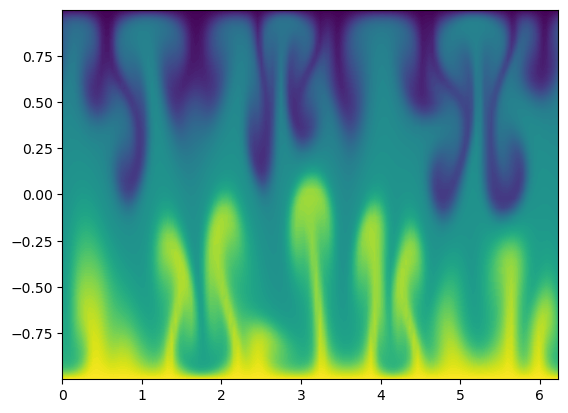

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
# initialization
T_b = Array(W_TF)
X = W_TF.local_mesh(True)
#T_b[:] = 0.5*(1-X[0]) + 0.001*np.random.randn(*T_b.shape)*(1-X[0])*(1+X[0])
T_b[:] = 0.5*(1-X[0]+0.25*np.sin(np.pi*X[0]))+0.001*np.random.randn(*T_b.shape)*(1-X[0])*(1+X[0])
T_ = T_b.forward(T_)
T_.mask_nyquist(mask)

t = 0
tstep = 0
end_time = 15
while t < end_time-1e-8:
    for rk in range(PDE.steps()):
        compute_convection(u_, H_)
        compute_uT(u_, T_, uT_)
        pdes['u'].compute_rhs(rk)
        pdes['T'].compute_rhs(rk)
        pdes['u'].solve_step(rk)
        compute_v(rk)
        pdes['T'].solve_step(rk)
    t += dt
    tstep += 1
plt.contourf(X[1], X[0], T_.backward(), 100)
plt.show()

A complete solver implemented in a solver class can be found in
[RayleighBenard2D.py](https://github.com/spectralDNS/shenfun/blob/master/demo/RayleighBenard2D.py).
Note that in the final solver it is also possible to use a $(y, t)$-dependent boundary condition
for the hot wall. And the solver can also be configured to store intermediate results to
an `HDF5` format that later can be visualized in, e.g., Paraview. The movie in the
beginning of this demo has been created in Paraview.

<!-- ======= Bibliography ======= -->

1. <a id="pandey18"></a> **A. Pandey, J. D. Scheel and J. Schumacher**.  Turbulent Superstructures in Rayleigh-B\'enard Convection, *Nature Communications*, 9(1), pp. 2118, [doi: 10.1038/s41467-018-04478-0](https://dx.doi.org/10.1038/s41467-018-04478-0), 2018.